In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv("possum.csv")

print(df)

     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
0        54.5  

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("possum.csv")
df = df.dropna()
# df['age'].fillna(df['age'].mean(), inplace = True)
# df['footlgth'].fillna(df['footlgth'].mean(), inplace = True)


# print(df.head())
# print(df.nunique())
# print(df.isna().sum())
# df.info()


features = ["hdlngth", "skullw", "taill", "footlgth", "earconch", "eye", "chest", "belly", "age", "sex", "Pop"]
target = "totlngth"

X = df[features]
y = df[target]

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['Pop'] = label_encoder.fit_transform(df['Pop'])
X = df

# X = pd.get_dummies(X, columns=["sex", "Pop"])

X


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,1,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,1,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,1,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


Mean Absolute Error: 7.443781041296288e-15
Mean Squared Error: 1.0578249090963664e-28
R2 score: 1.0


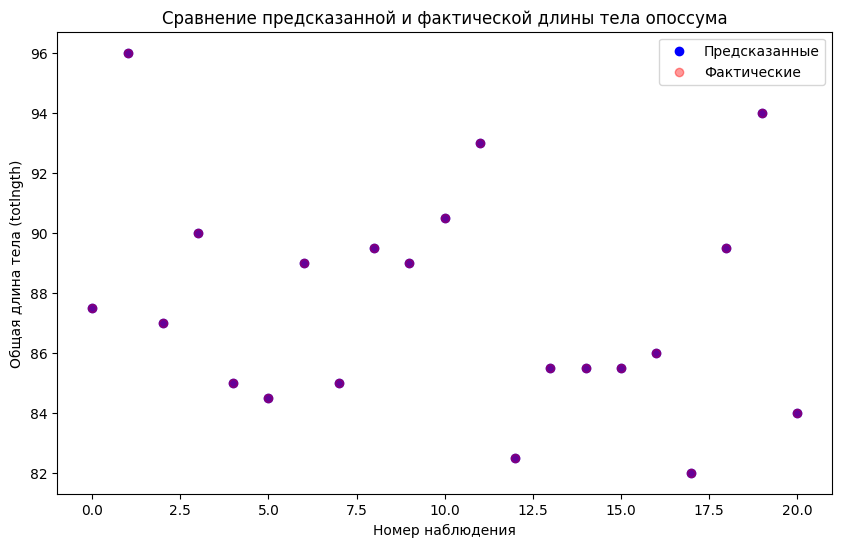

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# std = StandardScaler()
# X_std = std.fit_transform(X_train)
# X_std_test = std.transform(X_test)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred, label='Предсказанные', color='blue')
plt.scatter(range(len(y_test)), y_test, label='Фактические', color='red', alpha = 0.4)
plt.title('Сравнение предсказанной и фактической длины тела опоссума')
plt.xlabel('Номер наблюдения')
plt.ylabel('Общая длина тела (totlngth)')
plt.legend()
# plt.grid(True)
plt.show()

